<a href="https://colab.research.google.com/github/IvanaVic/T1DMClassification/blob/main/Classification_of_type_1_diabetes_using_gene_expression_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This notebook presents a machine learning approach to classify Type 1 Diabetes Mellitus (T1DM) based on gene expression data. Through a combination of feature selection techniques and classification models.

In [ ]:
pip install GEOparse

## Loading dataset from GEO

In [ ]:
import GEOparse
gse = GEOparse.get_GEO(geo="GSE9006", destdir="./")

22-Oct-2024 21:37:06 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
22-Oct-2024 21:37:06 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE9nnn/GSE9006/soft/GSE9006_family.soft.gz to ./GSE9006_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE9nnn/GSE9006/soft/GSE9006_family.soft.gz to ./GSE9006_family.soft.gz
100%|██████████| 35.7M/35.7M [00:01<00:00, 36.7MB/s]
22-Oct-2024 21:37:08 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
22-Oct-2024 21:37:08 DEBUG downloader - Moving /tmp/tmpe5obpf9_ to /content/GSE9006_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpe5obpf9_ to /content/GSE9006_family.soft.gz
22-Oct-2024 21:37:08 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE9nnn/GSE9006/soft/GSE9006_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE9nnn/GSE9006/soft/GSE900

In [ ]:
expression_data = gse.pivot_samples('VALUE').transpose()
def get_label(gsm):
    gsm_num = int(gsm[3:])
    if ((228562 <= gsm_num <= 228581) or
        (228663 <= gsm_num <= 228666) or
        (254177 <= gsm_num <= 254183) or
        (254277 <= gsm_num <= 254293)):
        return 0
    elif ((228582 <= gsm_num <= 228662) or
          (254184 <= gsm_num <= 254264)):
        return 1
    elif ((228667 <= gsm_num <= 228678) or
          (254265 <= gsm_num <= 254276)):
        return 2
    else:
        return -1

labels = [get_label(gsm) for gsm in expression_data.index]

expression_data['target'] = labels

In [ ]:
for gsm_name, gsm_data in gse.gsms.items():
    print(gsm_data.metadata['platform_id'][0])

GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL96
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL97
GPL9

In [ ]:
gpl96_samples = {gsm_name: gsm_data for gsm_name, gsm_data in gse.gsms.items() if gsm_data.metadata['platform_id'][0] == 'GPL96'}

print(f"Number of samples on GPL96: {len(gpl96_samples)}")

Number of samples on GPL96: 117


In [ ]:

import pandas as pd

expression_data = pd.DataFrame({
    gsm_name: gsm_data.table['VALUE']
    for gsm_name, gsm_data in gpl96_samples.items()
})

expression_data.index = gpl96_samples[next(iter(gpl96_samples))].table['ID_REF']
print(expression_data.head())
print(expression_data.shape)

                GSM228562  GSM228563  GSM228564  GSM228565  GSM228566  \
ID_REF                                                                  
AFFX-BioB-5_at      555.8      784.1      331.1      673.7      537.0   
AFFX-BioB-M_at     1398.5     1849.1      706.5     1000.1     1223.4   
AFFX-BioB-3_at      672.2     1092.0      484.5      622.2      505.9   
AFFX-BioC-5_at     2404.7     2698.7     1349.8     2045.5     1772.5   
AFFX-BioC-3_at     2278.0     3221.8     1280.3     1990.1     2149.6   

                GSM228567  GSM228568  GSM228569  GSM228570  GSM228571  ...  \
ID_REF                                                                 ...   
AFFX-BioB-5_at      467.0      330.1      211.3      312.6      288.8  ...   
AFFX-BioB-M_at      747.2      478.4      269.4      563.0      596.8  ...   
AFFX-BioB-3_at      428.4      380.2      150.9      295.2      307.8  ...   
AFFX-BioC-5_at     1429.3     1248.9      832.2     1192.6     1135.4  ...   
AFFX-BioC-3_at     1

In [ ]:
expression_data_t=expression_data.transpose()

In [ ]:
gpl96_labels = [get_label(gsm) for gsm in expression_data_t.index]

expression_data_t['target'] = gpl96_labels

print(expression_data_t.head())
print(expression_data_t.shape)
expression_data_t

ID_REF     AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
GSM228562           555.8          1398.5           672.2          2404.7   
GSM228563           784.1          1849.1          1092.0          2698.7   
GSM228564           331.1           706.5           484.5          1349.8   
GSM228565           673.7          1000.1           622.2          2045.5   
GSM228566           537.0          1223.4           505.9          1772.5   

ID_REF     AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  AFFX-CreX-5_at  \
GSM228562          2278.0           4390.7           9173.7         21038.2   
GSM228563          3221.8           5590.5          10942.4         31481.0   
GSM228564          1280.3           2401.1           7022.2         15917.7   
GSM228565          1990.1           3751.9           7939.2         19696.2   
GSM228566          2149.6           3120.3           7878.7         19956.3   

ID_REF     AFFX-CreX-3_at  AFFX-DapX-5_at  ...  222376_at  222

ID_REF,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-DapX-5_at,...,222376_at,222377_at,222378_at,222379_at,222380_s_at,222381_at,222382_x_at,222383_s_at,222384_at,target
GSM228562,555.8,1398.5,672.2,2404.7,2278.0,4390.7,9173.7,21038.2,31781.1,9.5,...,39.7,32.5,121.9,10.4,276.2,96.6,116.4,5.4,45.4,0
GSM228563,784.1,1849.1,1092.0,2698.7,3221.8,5590.5,10942.4,31481.0,37229.3,54.2,...,114.1,33.7,58.2,17.4,310.5,104.4,70.2,4.8,16.8,0
GSM228564,331.1,706.5,484.5,1349.8,1280.3,2401.1,7022.2,15917.7,24100.4,52.1,...,92.5,97.6,137.5,19.2,227.8,112.2,102.0,11.3,11.8,0
GSM228565,673.7,1000.1,622.2,2045.5,1990.1,3751.9,7939.2,19696.2,32538.1,32.5,...,50.8,23.7,86.5,14.0,279.7,137.4,116.8,7.4,40.6,0
GSM228566,537.0,1223.4,505.9,1772.5,2149.6,3120.3,7878.7,19956.3,38137.3,25.2,...,55.1,48.7,145.7,17.1,205.6,112.8,89.4,5.5,97.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM228674,431.6,611.6,463.3,1300.2,1238.9,1931.0,5601.5,13379.2,23366.5,9.6,...,120.9,19.4,124.0,49.4,484.8,185.9,92.2,19.0,7.4,2
GSM228675,520.0,716.7,568.6,1706.1,1775.0,2737.5,7343.5,20141.3,29064.3,51.6,...,117.2,44.0,45.3,8.9,607.5,71.0,141.7,12.7,20.3,2
GSM228676,476.1,842.7,566.9,1814.7,1371.4,3186.2,6586.1,18445.0,29583.0,2.0,...,73.6,13.0,40.8,30.7,621.1,111.1,183.0,5.3,47.9,2
GSM228677,449.8,700.6,408.2,1751.8,1405.4,2686.0,6760.9,16514.4,28092.9,11.5,...,82.8,203.4,65.8,20.5,626.2,246.5,116.1,14.5,27.6,2


In [ ]:
expression_data_t = expression_data_t[expression_data_t['target'] != 2]

In [ ]:
expression_data_t

ID_REF,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-DapX-5_at,...,222376_at,222377_at,222378_at,222379_at,222380_s_at,222381_at,222382_x_at,222383_s_at,222384_at,target
GSM228562,555.8,1398.5,672.2,2404.7,2278.0,4390.7,9173.7,21038.2,31781.1,9.5,...,39.7,32.5,121.9,10.4,276.2,96.6,116.4,5.4,45.4,0
GSM228563,784.1,1849.1,1092.0,2698.7,3221.8,5590.5,10942.4,31481.0,37229.3,54.2,...,114.1,33.7,58.2,17.4,310.5,104.4,70.2,4.8,16.8,0
GSM228564,331.1,706.5,484.5,1349.8,1280.3,2401.1,7022.2,15917.7,24100.4,52.1,...,92.5,97.6,137.5,19.2,227.8,112.2,102.0,11.3,11.8,0
GSM228565,673.7,1000.1,622.2,2045.5,1990.1,3751.9,7939.2,19696.2,32538.1,32.5,...,50.8,23.7,86.5,14.0,279.7,137.4,116.8,7.4,40.6,0
GSM228566,537.0,1223.4,505.9,1772.5,2149.6,3120.3,7878.7,19956.3,38137.3,25.2,...,55.1,48.7,145.7,17.1,205.6,112.8,89.4,5.5,97.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM228662,389.4,674.1,371.3,1537.5,1488.8,2557.2,6487.9,14160.8,24920.0,3.8,...,70.2,53.3,164.0,19.3,317.0,46.5,75.9,5.5,4.8,1
GSM228663,565.5,855.1,504.3,2162.4,2115.8,4400.8,8757.5,18315.8,25262.3,6.8,...,79.1,64.1,145.8,7.5,806.5,54.6,82.7,10.4,12.1,0
GSM228664,682.3,1240.9,813.2,2640.6,1997.1,4557.5,10713.4,31634.1,40931.7,3.0,...,148.3,157.9,111.4,18.7,1131.9,129.6,177.5,17.0,26.8,0
GSM228665,641.3,1242.3,648.2,2381.5,2319.4,4540.2,9461.7,24605.9,35034.0,39.3,...,74.6,25.0,103.7,30.7,449.3,98.2,120.7,6.1,18.4,0


In [ ]:
X = expression_data_t.drop(columns=['target'])
y = expression_data_t['target']

In [ ]:
X.describe()

ID_REF,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-DapX-5_at,...,222375_at,222376_at,222377_at,222378_at,222379_at,222380_s_at,222381_at,222382_x_at,222383_s_at,222384_at
count,105.000000,105.000000,105.00000,105.000000,105.000000,105.00000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,542.309524,934.512381,565.91619,1780.992381,1754.318095,3618.66000,7785.599048,19131.139048,28271.486667,34.222857,...,181.894286,85.317143,71.348571,96.219048,23.753333,461.160952,97.929524,118.610476,12.188571,29.209524
std,190.354084,407.701461,242.25120,626.649569,638.431406,1332.18157,2266.389703,6356.138346,7459.584418,22.441459,...,116.466175,34.096595,45.146069,49.410286,20.026675,193.563597,44.919083,35.450325,13.326898,25.841594
min,211.300000,269.400000,150.90000,832.200000,761.500000,1314.50000,3620.700000,7259.700000,12375.900000,3.000000,...,18.000000,13.600000,9.100000,11.100000,3.400000,177.300000,14.200000,52.800000,2.800000,3.000000
25%,401.000000,671.600000,418.40000,1415.300000,1349.100000,2694.10000,6487.900000,14922.300000,22855.600000,18.200000,...,102.100000,60.700000,35.400000,58.200000,9.100000,322.000000,71.300000,92.900000,5.000000,8.700000
50%,499.100000,839.400000,505.90000,1592.200000,1547.600000,3379.60000,7203.800000,17455.200000,26350.500000,31.500000,...,151.500000,81.200000,64.100000,92.200000,16.800000,424.900000,92.100000,116.800000,7.400000,20.900000
75%,631.300000,1091.500000,644.00000,2010.800000,2017.100000,4068.90000,8340.800000,20773.500000,31772.500000,46.100000,...,252.400000,103.200000,96.600000,123.200000,34.200000,549.800000,116.400000,141.200000,13.400000,44.300000
max,1336.700000,2745.700000,1696.30000,4818.300000,4660.200000,9114.70000,19636.400000,41043.900000,50461.500000,127.900000,...,748.800000,197.000000,231.500000,268.800000,104.000000,1131.900000,281.800000,254.200000,75.200000,143.900000


In [ ]:
if X.isnull().values.any():
    print("There are null values in the dataset.")
else:
    print("No null values in the dataset.")

No null values in the dataset.


Due to the very small number of Type 2 Diabetes Mellitus (T2DM) patients and the distinct differences in the mechanisms of Type 1 and Type 2 diabetes, T2DM patients were excluded from this analysis

In [ ]:
y.value_counts()

,count
target,
1,81
0,24


## Data normalization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [ ]:
X_scaled

ID_REF,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-DapX-5_at,...,222375_at,222376_at,222377_at,222378_at,222379_at,222380_s_at,222381_at,222382_x_at,222383_s_at,222384_at
GSM228562,0.306113,0.455963,0.337324,0.394496,0.388976,0.394375,0.346722,0.407839,0.509515,0.052042,...,0.166393,0.142312,0.105216,0.429957,0.069583,0.103604,0.307922,0.315789,0.035912,0.300923
GSM228563,0.508975,0.637928,0.608969,0.468252,0.631057,0.548191,0.457158,0.716942,0.652567,0.409928,...,0.191571,0.547983,0.110612,0.182771,0.139165,0.139535,0.337070,0.086395,0.027624,0.097942
GSM228564,0.106451,0.176513,0.215866,0.129851,0.133070,0.139304,0.212385,0.256274,0.307846,0.393114,...,0.210317,0.430207,0.397932,0.490493,0.157058,0.052902,0.366218,0.244290,0.117403,0.062456
GSM228565,0.410876,0.295077,0.304970,0.304383,0.315131,0.312479,0.269642,0.368116,0.529392,0.236189,...,0.137794,0.202835,0.065647,0.292588,0.105368,0.107270,0.460389,0.317776,0.063536,0.266856
GSM228566,0.289408,0.385252,0.229714,0.235895,0.356042,0.231507,0.265864,0.375815,0.676408,0.177742,...,0.376300,0.226281,0.178058,0.522313,0.136183,0.029646,0.368460,0.181728,0.037293,0.672818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM228662,0.158255,0.163429,0.142617,0.176940,0.186549,0.159316,0.179024,0.204270,0.329366,0.006405,...,0.456486,0.308615,0.198741,0.593326,0.158052,0.146344,0.120703,0.114697,0.037293,0.012775
GSM228663,0.314733,0.236522,0.228679,0.333710,0.347372,0.395669,0.320735,0.327257,0.338354,0.030424,...,0.698139,0.357143,0.247302,0.522701,0.040755,0.659124,0.150972,0.148461,0.104972,0.064585
GSM228664,0.418518,0.392319,0.428562,0.453677,0.316926,0.415759,0.442859,0.721473,0.749779,0.000000,...,1.000000,0.734460,0.669065,0.389212,0.152087,1.000000,0.431241,0.619166,0.196133,0.168914
GSM228665,0.382086,0.392885,0.321794,0.388676,0.399595,0.413541,0.364705,0.513441,0.594926,0.290633,...,0.350301,0.332606,0.071493,0.359333,0.271372,0.284936,0.313901,0.337140,0.045580,0.109297


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

In [ ]:
y_train.value_counts()

,count
target,
1,51
0,12


In [ ]:
y_test.value_counts()

,count
target,
1,30
0,12


In [ ]:
pip install xgboost

## Ranking genes with t-test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import LearningCurveDisplay
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML
from sklearn.multiclass import OneVsRestClassifier

def rank_genes_ttest(X, y, n_top_genes=1000):

    class0_data = X[y == 0]
    class1_data = X[y == 1]

    t_stats, p_values = stats.ttest_ind(class0_data, class1_data)

    gene_scores = pd.DataFrame({
        'Gene': X.columns,
        'T_statistic': np.abs(t_stats),
        'P_value': p_values
    })

    gene_scores = gene_scores.sort_values('T_statistic', ascending=False)

    ranked_genes = gene_scores['Gene'].head(n_top_genes).tolist()

    return ranked_genes, gene_scores

print("Ranking genes using Student's t-test...")
top_genes, gene_scores = rank_genes_ttest(X_train, y_train, n_top_genes=5000)

print("\nTop 5000 genes by t-test ranking:")
display(gene_scores.head(5000))

X_train_top_genes = X_train[top_genes]
X_test_top_genes = X_test[top_genes]

Ranking genes using Student's t-test...

Top 5000 genes by t-test ranking:


,Gene,T_statistic,P_value
19842,219939_s_at,5.443343,9.835969e-07
8824,208790_s_at,5.138168,3.083711e-06
7264,207200_at,5.096167,3.602875e-06
5885,205819_at,4.919913,6.888362e-06
1370,201302_at,4.912421,7.079474e-06
...,...,...,...
10541,210534_s_at,1.484965,1.427027e-01
8968,208934_s_at,1.484949,1.427070e-01
4276,204210_s_at,1.484877,1.427260e-01
2754,202686_s_at,1.484858,1.427311e-01


## Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def select_features_mi(X, y, threshold=0.05):
    selector = SelectKBest(mutual_info_classif, k='all')
    selector.fit(X, y)
    mi_scores = selector.scores_
    return np.array([True if score > threshold else False for score in mi_scores])

def select_features_chi2(X, y, threshold=0.05):
    selector = SelectKBest(chi2, k='all')
    selector.fit(X, y)
    chi2_scores = selector.scores_
    return np.array([True if score > threshold else False for score in chi2_scores])

def select_features_anova(X, y, threshold=0.05):
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X, y)
    f_scores, p_values = selector.scores_, selector.pvalues_
    return np.array([True if p < threshold else False for p in p_values])

feature_selectors = {
    'Chi-Square': SelectKBest(chi2, k='all'),
    'ANOVA': SelectKBest(f_classif, k='all'),
    'Mutual Information': SelectKBest(mutual_info_classif, k='all'),
    'PCA': PCA(n_components=10)
}

## Classifiers

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100
    ),
    'SVM': SVC(
        C=200,
        degree=3,
        gamma= 'auto',
        kernel='linear',
        class_weight='balanced',
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        C=1,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=100,
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        p=2,
        n_neighbors=2,
        metric='euclidean',
        weights='distance'
    ),
    'XGBoost': XGBClassifier(
        colsample_bytree=0.6521211214797689,
        gamma=1.7908135901642024,
        learning_rate=0.2259725093210579,
        max_depth=13,
        min_child_weight=3,
        n_estimators=247,
        subsample=0.6110539052353652,
        scale_pos_weight=1
    )
}

## Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import average_precision_score

def evaluate_model(clf, X_train, y_train, X_test, y_test, threshold=0.5):
    if hasattr(clf, "predict_proba"):
        y_train_proba = clf.predict_proba(X_train)
        y_test_proba = clf.predict_proba(X_test)

        y_train_pred = np.argmax(y_train_proba, axis=1)
        y_test_pred = np.argmax(y_test_proba, axis=1)

        y_train_pred[y_train_proba[:, 0] > threshold] = 0
        y_test_pred[y_test_proba[:, 0] > threshold] = 0

        y_test_score = y_test_proba[:, 1]
    else:
        if hasattr(clf, "decision_function"):
            y_train_decision = clf.decision_function(X_train)
            y_test_decision = clf.decision_function(X_test)

            if len(y_train_decision.shape) == 1:
                y_train_pred = (y_train_decision > threshold).astype(int)
                y_test_pred = (y_test_decision > threshold).astype(int)
                y_test_score = y_test_decision
            else:
                y_train_pred = np.argmax(y_train_decision, axis=1)
                y_test_pred = np.argmax(y_test_decision, axis=1)
                y_test_score = y_test_decision[:, 1]
        else:
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            y_test_score = y_test_pred

    metrics = {}

    metrics['Train Accuracy'] = accuracy_score(y_train, y_train_pred)
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
        y_train, y_train_pred, average='weighted'
    )
    metrics['Train Precision'] = train_precision
    metrics['Train Recall'] = train_recall
    metrics['Train F1'] = train_f1

    metrics['Test Accuracy'] = accuracy_score(y_test, y_test_pred)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        y_test, y_test_pred, average='weighted'
    )
    metrics['Test Precision'] = test_precision
    metrics['Test Recall'] = test_recall
    metrics['Test F1'] = test_f1

    _, class_recalls, _, _ = precision_recall_fscore_support(
        y_test, y_test_pred, average=None
    )
    metrics['Class 0 Recall'] = class_recalls[0]

    metrics['Classification Report'] = classification_report(y_test, y_test_pred)

    average_precision = average_precision_score(y_test, y_test_score)
    metrics['Average Precision'] = average_precision

    return metrics

## Results


Feature Selection Method: Chi-Square

Classifier: Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.73      1.00      0.85        30

    accuracy                           0.74        42
   macro avg       0.87      0.54      0.50        42
weighted avg       0.81      0.74      0.65        42


Classifier: SVM

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.87      0.90      0.89        30

    accuracy                           0.83        42
   macro avg       0.80      0.78      0.79        42
weighted avg       0.83      0.83      0.83        42


Classifier: Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12


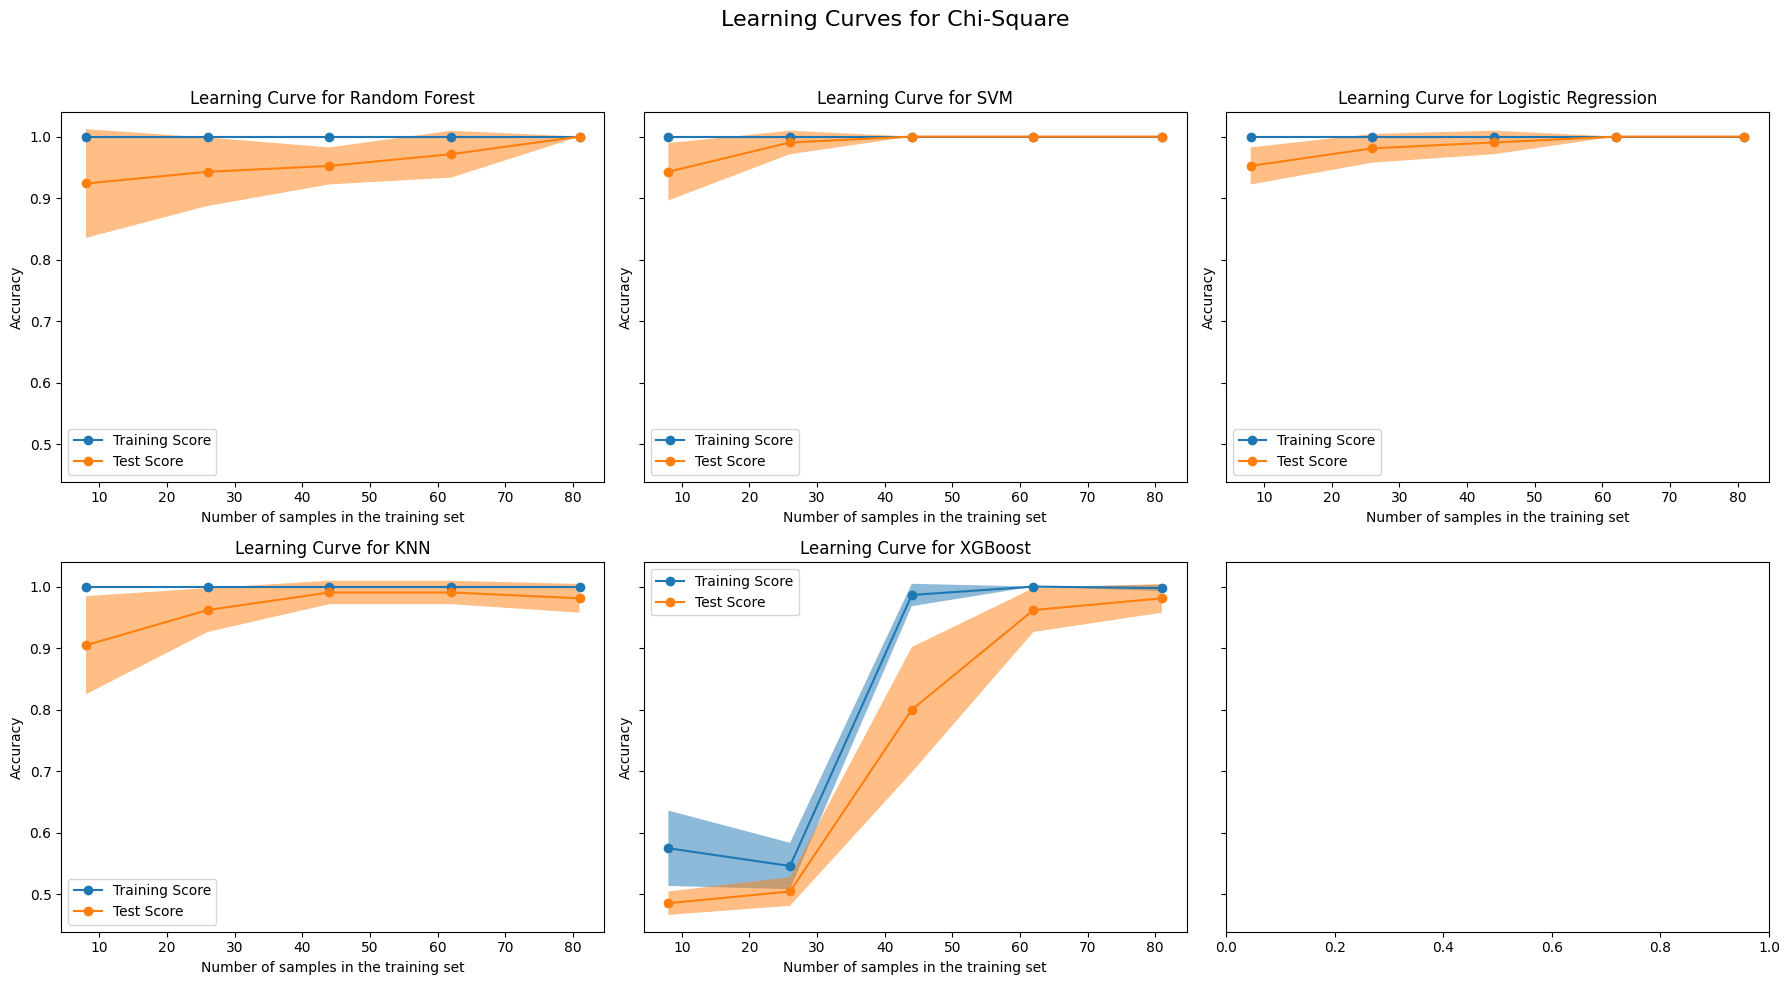


Feature Selection Method: ANOVA

Classifier: Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.76      0.93      0.84        30

    accuracy                           0.74        42
   macro avg       0.68      0.59      0.59        42
weighted avg       0.71      0.74      0.70        42


Classifier: SVM

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.88      0.93      0.90        30

    accuracy                           0.86        42
   macro avg       0.84      0.80      0.82        42
weighted avg       0.85      0.86      0.85        42


Classifier: Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
     

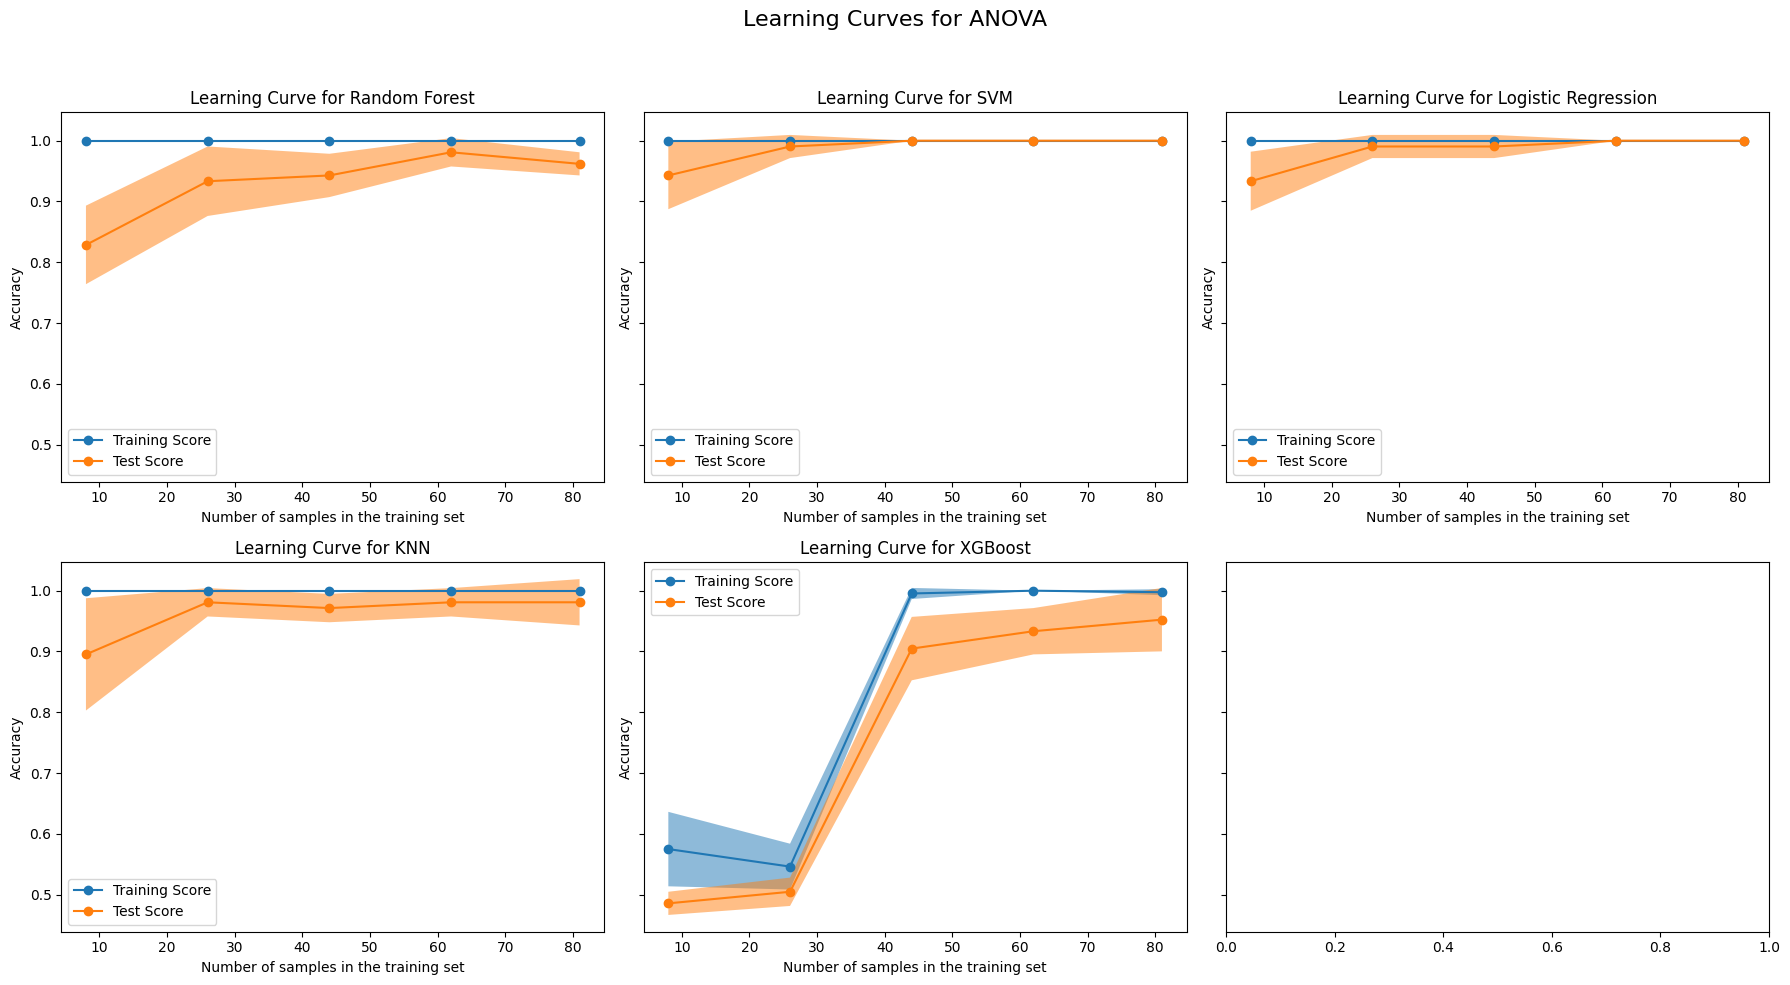


Feature Selection Method: Mutual Information

Classifier: Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.77      1.00      0.87        30

    accuracy                           0.79        42
   macro avg       0.88      0.62      0.63        42
weighted avg       0.84      0.79      0.74        42


Classifier: SVM

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.88      0.93      0.90        30

    accuracy                           0.86        42
   macro avg       0.84      0.80      0.82        42
weighted avg       0.85      0.86      0.85        42


Classifier: Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59   

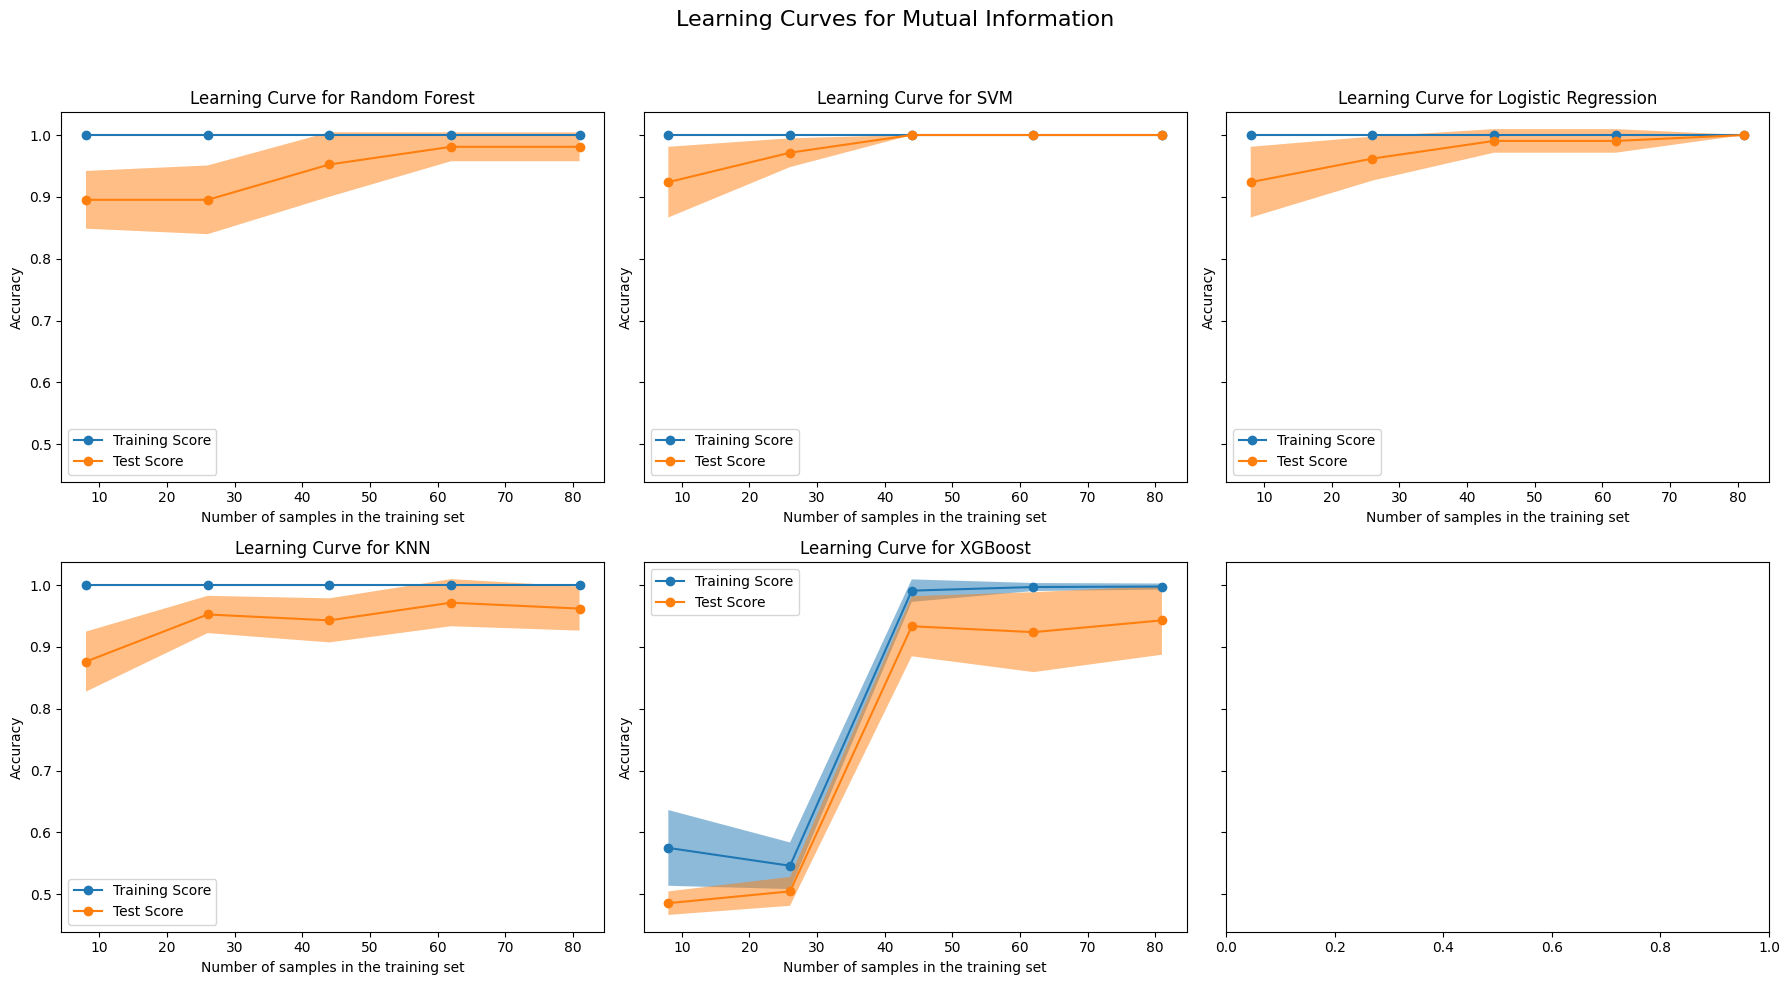


Feature Selection Method: PCA

Classifier: Random Forest

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.77      1.00      0.87        30

    accuracy                           0.79        42
   macro avg       0.88      0.62      0.63        42
weighted avg       0.84      0.79      0.74        42


Classifier: SVM

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.88      1.00      0.94        30

    accuracy                           0.90        42
   macro avg       0.94      0.83      0.87        42
weighted avg       0.92      0.90      0.90        42


Classifier: Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
       

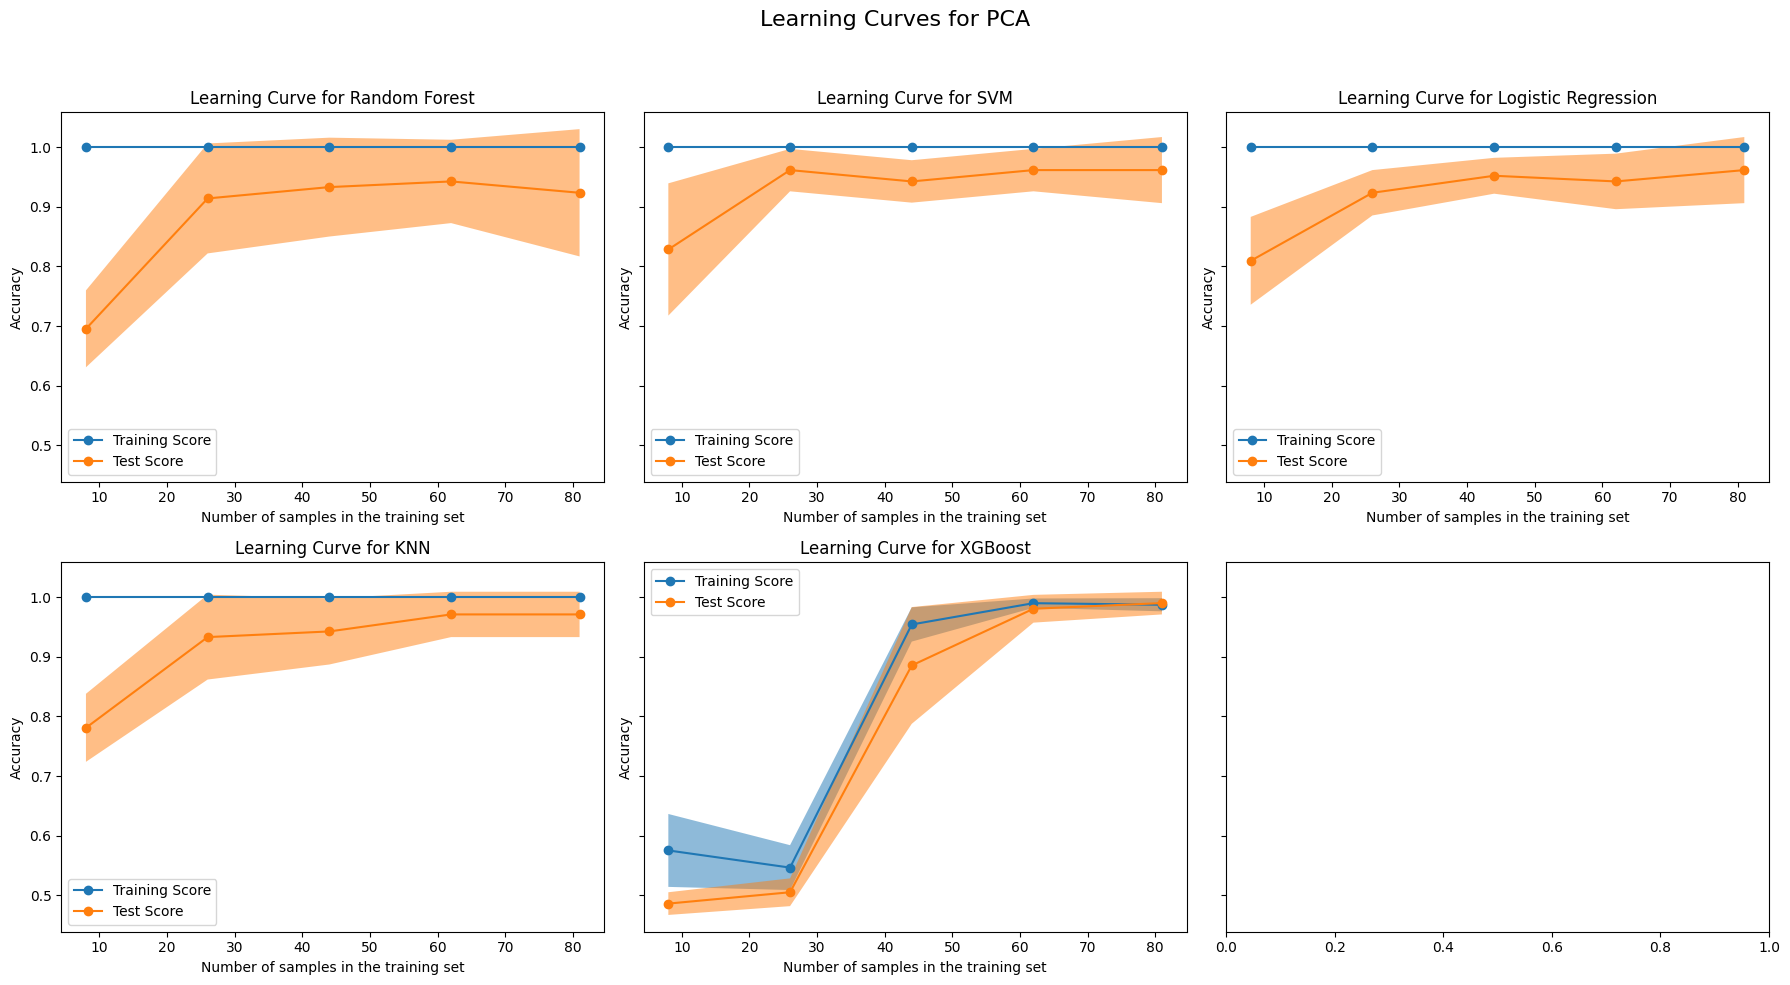

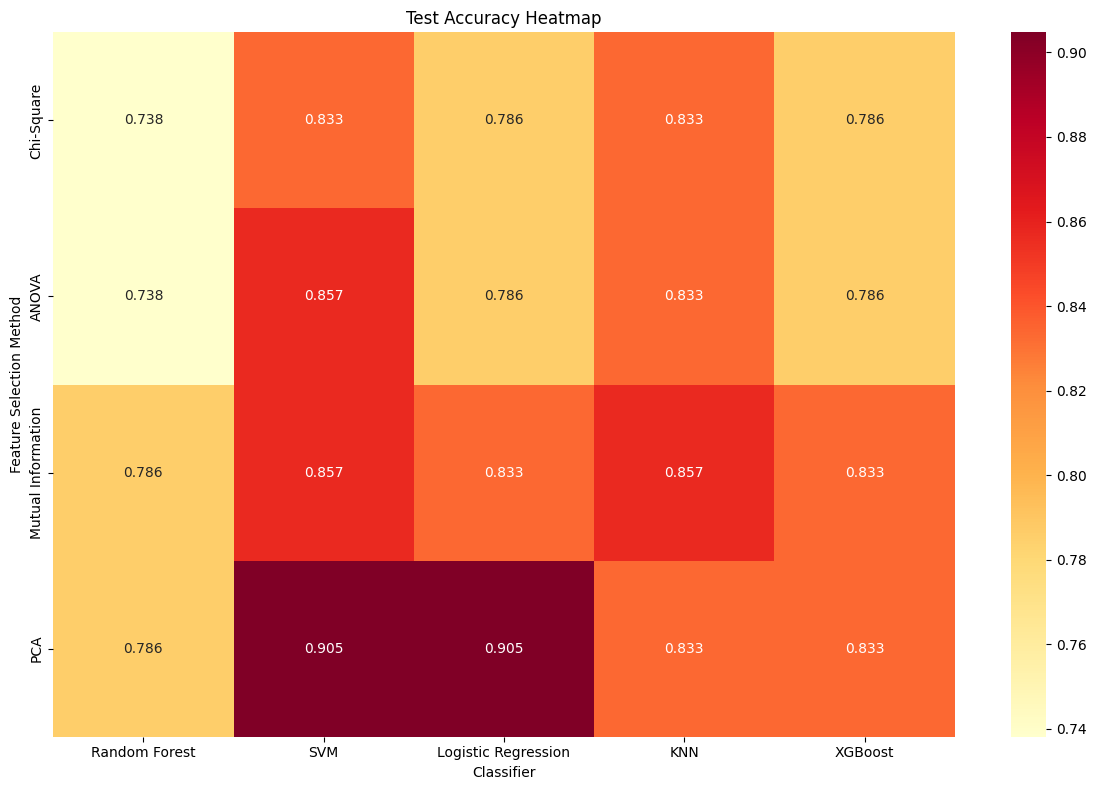

,Feature Selection,Classifier,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall
0,Chi-Square,Random Forest,1.000,0.738,0.648,0.808,0.738
1,Chi-Square,SVM,1.000,0.833,0.831,0.830,0.833
2,Chi-Square,Logistic Regression,1.000,0.786,0.735,0.835,0.786
3,Chi-Square,KNN,1.000,0.833,0.818,0.837,0.833
4,Chi-Square,XGBoost,1.000,0.786,0.753,0.788,0.786
5,ANOVA,Random Forest,1.000,0.738,0.698,0.712,0.738
6,ANOVA,SVM,1.000,0.857,0.853,0.854,0.857
7,ANOVA,Logistic Regression,1.000,0.786,0.753,0.788,0.786
8,ANOVA,KNN,1.000,0.833,0.825,0.828,0.833
9,ANOVA,XGBoost,1.000,0.786,0.735,0.835,0.786


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE

results = {}

for selector_name, selector in feature_selectors.items():
    print(f"\nFeature Selection Method: {selector_name}")
    results[selector_name] = {}

    if selector_name == 'PCA':
        X_train_selected = selector.fit_transform(X_train_top_genes)
        X_test_selected = selector.transform(X_test_top_genes)
    else:
        if selector_name == 'Chi-Square':
            X_train_min = X_train_top_genes.min().min()
            if X_train_min < 0:
                X_train_shifted = X_train_top_genes - X_train_min + 0.1
                X_test_shifted = X_test_top_genes - X_train_min + 0.1
                selector.fit(X_train_shifted, y_train)
                X_train_selected = selector.transform(X_train_shifted)
                X_test_selected = selector.transform(X_test_shifted)
            else:
                selector.fit(X_train_top_genes, y_train)
                X_train_selected = selector.transform(X_train_top_genes)
                X_test_selected = selector.transform(X_test_top_genes)
        else:
            selector.fit(X_train_top_genes, y_train)
            X_train_selected = selector.transform(X_train_top_genes)
            X_test_selected = selector.transform(X_test_top_genes)

    if selector_name in ['Mutual Information', 'Chi-Square', 'ANOVA']:
        if selector_name == 'Mutual Information':
            mask = select_features_mi(X_train_top_genes, y_train, threshold=0.05)
        elif selector_name == 'Chi-Square':
            mask = select_features_chi2(X_train_top_genes, y_train, threshold=0.5)
        elif selector_name == 'ANOVA':
            mask = select_features_anova(X_train_top_genes, y_train, threshold=0.05)

        X_train_selected = X_train_selected[:, mask]
        X_test_selected = X_test_selected[:, mask]

    smote = SMOTE()
    X_balanced_train, y_balanced_train = smote.fit_resample(X_train_selected, y_train)

    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
    fig.suptitle(f"Learning Curves for {selector_name}", fontsize=16)

    for ax_idx, (clf_name, clf) in enumerate(classifiers.items()):
        print(f"\nClassifier: {clf_name}")

        clf.fit(X_balanced_train, y_balanced_train)

        metrics = evaluate_model(clf, X_balanced_train, y_balanced_train,
                                  X_test_selected, y_test, threshold=0.5)
        results[selector_name][clf_name] = metrics

        print(f"\nClassification Report for {clf_name}:")
        print(metrics['Classification Report'])

        LearningCurveDisplay.from_estimator(
            clf, X_balanced_train, y_balanced_train,
            train_sizes=np.linspace(0.1, 1.0, 5),
            cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
            score_type="both",
            n_jobs=4,
            line_kw={"marker": "o"},
            std_display_style="fill_between",
            score_name="Accuracy",
            ax=ax[ax_idx//3, ax_idx%3]
        )
        ax[ax_idx//3, ax_idx%3].set_title(f"Learning Curve for {clf_name}")
        handles, labels = ax[ax_idx//3, ax_idx%3].get_legend_handles_labels()
        ax[ax_idx//3, ax_idx%3].legend(handles[:2], ["Training Score", "Test Score"])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plt.figure(figsize=(12, 8))
heatmap_data = []
selector_names = list(results.keys())
clf_names = list(classifiers.keys())

for selector_name in selector_names:
    row = []
    for clf_name in clf_names:
        row.append(results[selector_name][clf_name]['Test Accuracy'])
    heatmap_data.append(row)

sns.heatmap(
    np.array(heatmap_data),
    annot=True,
    fmt='.3f',
    xticklabels=clf_names,
    yticklabels=selector_names,
    cmap='YlOrRd'
)
plt.title('Test Accuracy Heatmap')
plt.xlabel('Classifier')
plt.ylabel('Feature Selection Method')
plt.tight_layout()
plt.show()

rows = []
for selector_name in results:
    for clf_name in results[selector_name]:
        metrics = results[selector_name][clf_name]
        row = {
            'Feature Selection': selector_name,
            'Classifier': clf_name,
            'Train Accuracy': f"{metrics['Train Accuracy']:.3f}",
            'Test Accuracy': f"{metrics['Test Accuracy']:.3f}",
            'F1 Score': f"{metrics['Test F1']:.3f}",
            'Precision': f"{metrics['Test Precision']:.3f}",
            'Recall': f"{metrics['Test Recall']:.3f}"
        }
        rows.append(row)

results_df = pd.DataFrame(rows)
display(HTML("<h2>Results Summary</h2>"))
display(results_df.style.background_gradient(subset=['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'], cmap='YlOrRd'))



Feature Selection Method: Chi-Square
Number of features selected: 1703

Top 10 selected genes:
['219939_s_at', '208790_s_at', '207200_at', '205819_at', '201302_at', '201162_at', '203300_x_at', '210139_s_at', '218882_s_at', '206187_at']

Feature Selection Method: ANOVA
Number of features selected: 2343

Top 10 selected genes:
['219939_s_at', '208790_s_at', '207200_at', '205819_at', '201302_at', '201162_at', '203300_x_at', '210139_s_at', '218882_s_at', '206187_at']

Feature Selection Method: Mutual Information
Number of features selected: 1586

Top 10 selected genes:
['219939_s_at', '208790_s_at', '207200_at', '205819_at', '201302_at', '201162_at', '203300_x_at', '210139_s_at', '218882_s_at', '206187_at']

Feature Selection Method: PCA
Number of features selected: 10


,Number of Features
Chi-Square,1703
ANOVA,2343
Mutual Information,1586
PCA,10



Chi-Square - Top 20 selected genes:
219939_s_at, 208790_s_at, 207200_at, 205819_at, 201302_at, 201162_at, 203300_x_at, 210139_s_at, 218882_s_at, 206187_at, 208908_s_at, 213142_x_at, 206606_at, 210959_s_at, 216988_s_at, 207492_at, 204393_s_at, 217767_at, 201300_s_at, 203528_at
... and 1683 more genes

ANOVA - Top 20 selected genes:
219939_s_at, 208790_s_at, 207200_at, 205819_at, 201302_at, 201162_at, 203300_x_at, 210139_s_at, 218882_s_at, 206187_at, 208908_s_at, 213142_x_at, 206606_at, 210959_s_at, 216988_s_at, 207492_at, 204393_s_at, 217767_at, 201300_s_at, 203334_at
... and 2323 more genes

Mutual Information - Top 20 selected genes:
219939_s_at, 208790_s_at, 207200_at, 205819_at, 201302_at, 201162_at, 203300_x_at, 210139_s_at, 218882_s_at, 206187_at, 208908_s_at, 213142_x_at, 206606_at, 210959_s_at, 216988_s_at, 207492_at, 204393_s_at, 217767_at, 201300_s_at, 203334_at
... and 1566 more genes


<Figure size 1000x600 with 0 Axes>

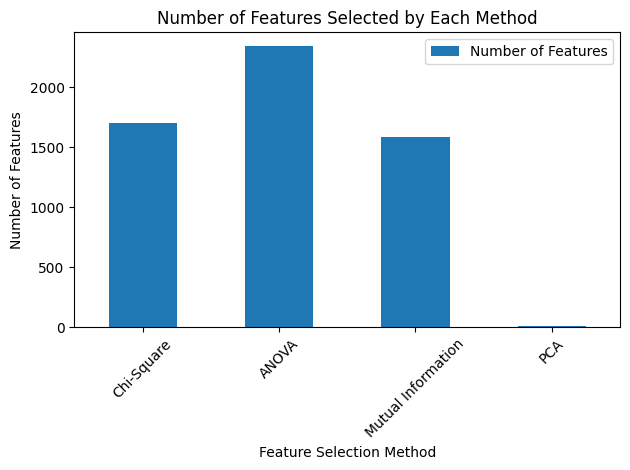

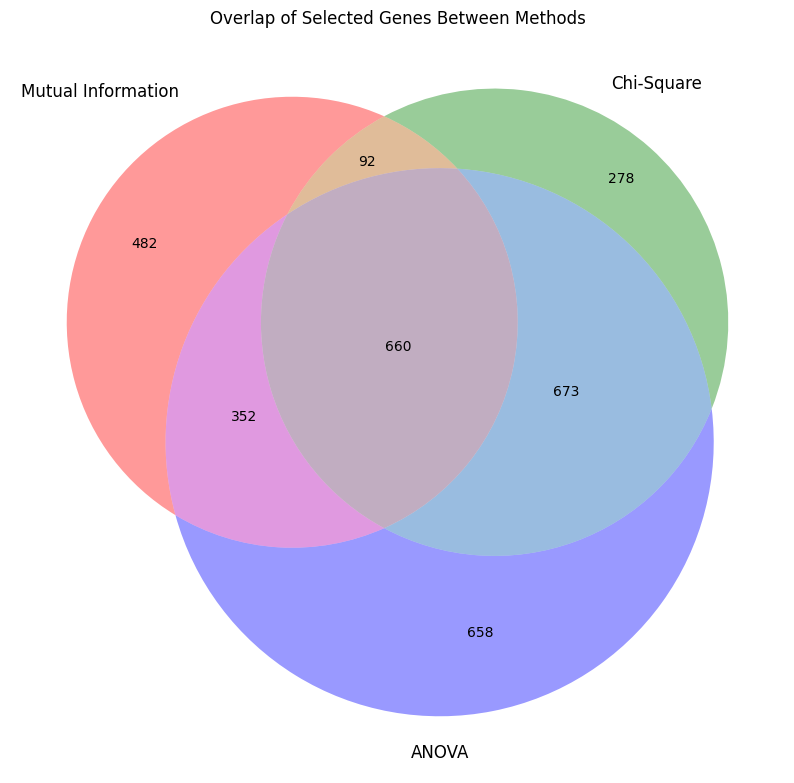

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV

results = {}
feature_counts = {}
selected_genes = {}

gene_names = X_train_top_genes.columns

for selector_name, selector in feature_selectors.items():
    print(f"\nFeature Selection Method: {selector_name}")
    results[selector_name] = {}

    if selector_name == 'PCA':
        X_train_selected = selector.fit_transform(X_train_top_genes)
        X_test_selected = selector.transform(X_test_top_genes)
        feature_counts[selector_name] = X_train_selected.shape[1]
        selected_genes[selector_name] = [f"PC{i+1}" for i in range(X_train_selected.shape[1])]
    else:
        if selector_name == 'Chi-Square':
            X_train_min = X_train_top_genes.min().min()
            if X_train_min < 0:
                X_train_shifted = X_train_top_genes - X_train_min + 0.1
                X_test_shifted = X_test_top_genes - X_train_min + 0.1
                selector.fit(X_train_shifted, y_train)
                X_train_selected = selector.transform(X_train_shifted)
                X_test_selected = selector.transform(X_test_shifted)
            else:
                selector.fit(X_train_top_genes, y_train)
                X_train_selected = selector.transform(X_train_top_genes)
                X_test_selected = selector.transform(X_test_top_genes)
        else:
            selector.fit(X_train_top_genes, y_train)
            X_train_selected = selector.transform(X_train_top_genes)
            X_test_selected = selector.transform(X_test_top_genes)

    if selector_name in ['Mutual Information', 'Chi-Square', 'ANOVA']:
        if selector_name == 'Mutual Information':
            mask = select_features_mi(X_train_top_genes, y_train, threshold=0.05)
        elif selector_name == 'Chi-Square':
            mask = select_features_chi2(X_train_top_genes, y_train, threshold=0.5)
        elif selector_name == 'ANOVA':
            mask = select_features_anova(X_train_top_genes, y_train, threshold=0.05)

        X_train_selected = X_train_selected[:, mask]
        X_test_selected = X_test_selected[:, mask]

        selected_genes[selector_name] = list(gene_names[mask])
        feature_counts[selector_name] = X_train_selected.shape[1]

    print(f"Number of features selected: {X_train_selected.shape[1]}")

    if selector_name != 'PCA':
        print("\nTop 10 selected genes:")
        print(selected_genes[selector_name][:10])

feature_counts_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['Number of Features'])

display(HTML("<h2>Number of Selected Features by Method</h2>"))
display(feature_counts_df)

display(HTML("<h2>Selected Genes by Method</h2>"))
for method, genes in selected_genes.items():
    if method != 'PCA':
        print(f"\n{method} - Top 20 selected genes:")
        print(", ".join(genes[:20]))
        print(f"... and {len(genes) - 20} more genes")

for method, genes in selected_genes.items():
    if method != 'PCA':
        pd.DataFrame(genes, columns=['Gene']).to_csv(f'selected_genes_{method}.csv', index=False)

plt.figure(figsize=(10, 6))
feature_counts_df.plot(kind='bar')
plt.title('Number of Features Selected by Each Method')
plt.xlabel('Feature Selection Method')
plt.ylabel('Number of Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from matplotlib_venn import venn3
plt.figure(figsize=(10, 10))
if all(method in selected_genes for method in ['Mutual Information', 'Chi-Square', 'ANOVA']):
    venn3([set(selected_genes['Mutual Information']),
           set(selected_genes['Chi-Square']),
           set(selected_genes['ANOVA'])],
          ('Mutual Information', 'Chi-Square', 'ANOVA'))
    plt.title('Overlap of Selected Genes Between Methods')
    plt.show()



Top 10 genes from t-test: ['219939_s_at', '208790_s_at', '207200_at', '205819_at', '201302_at', '201162_at', '203300_x_at', '210139_s_at', '218882_s_at', '206187_at']
Genes from t-test that are in the overlap of Mutual Information, Chi-Square, and ANOVA: ['219939_s_at', '208790_s_at', '207200_at', '205819_at', '201302_at', '201162_at', '203300_x_at', '210139_s_at', '218882_s_at', '206187_at']
Gene '219939_s_at' is in the overlap of the Venn diagram
Gene '208790_s_at' is in the overlap of the Venn diagram
Gene '207200_at' is in the overlap of the Venn diagram
Gene '205819_at' is in the overlap of the Venn diagram
Gene '201302_at' is in the overlap of the Venn diagram
Gene '201162_at' is in the overlap of the Venn diagram
Gene '203300_x_at' is in the overlap of the Venn diagram
Gene '210139_s_at' is in the overlap of the Venn diagram
Gene '218882_s_at' is in the overlap of the Venn diagram
Gene '206187_at' is in the overlap of the Venn diagram


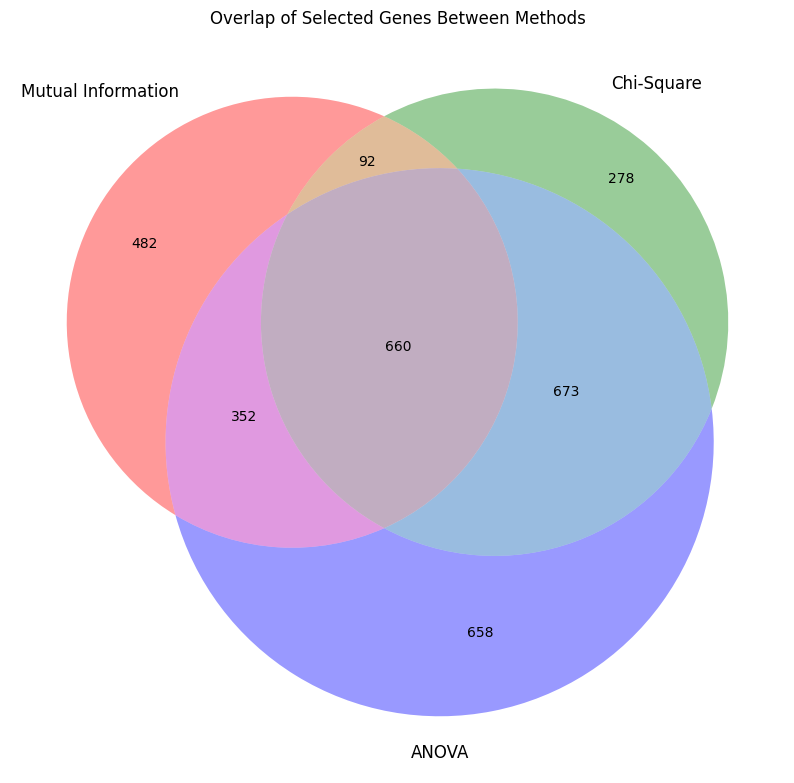

In [ ]:
top_10_ttest_genes = top_genes[:10]

mutual_info_genes = set(selected_genes['Mutual Information'])
chi2_genes = set(selected_genes['Chi-Square'])
anova_genes = set(selected_genes['ANOVA'])

overlap_genes = mutual_info_genes.intersection(chi2_genes).intersection(anova_genes)

overlap_with_ttest = [gene for gene in top_10_ttest_genes if gene in overlap_genes]

print(f"\nTop 10 genes from t-test: {top_10_ttest_genes}")
print(f"Genes from t-test that are in the overlap of Mutual Information, Chi-Square, and ANOVA: {overlap_with_ttest}")

from matplotlib_venn import venn3

plt.figure(figsize=(10, 10))
venn3([mutual_info_genes, chi2_genes, anova_genes],
      ('Mutual Information', 'Chi-Square', 'ANOVA'))
plt.title('Overlap of Selected Genes Between Methods')

for gene in top_10_ttest_genes:
    if gene in overlap_genes:
        print(f"Gene '{gene}' is in the overlap of the Venn diagram")

plt.show()

## Conclusion
SVM and Logistic Regression, especially when combined with PCA, achieved the highest classification accuracy of 90.5%. A total of 660 genes were consistently selected across all feature selection techniques, with the top 5 genes identified by the t-test also appearing among the top genes selected by other methods. These findings suggest robust consistency in the selected genes, highlighting their potential relevance to T1DM classification.